In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [55]:
fiisDf = pd.read_csv('./newFii.csv') # 19/09/22
fiisDf

,Papel,Segmento,Cotação,FFO Yield,Dividend Yield,P/VP,Valor de Mercado,Liquidez,Qtd de imóveis,Preço do m2,Aluguel por m2,Cap Rate,Vacância Média,ultimoDividendo
0,ABCP11,Shoppings,76.00,0.0893,0.0861,0.83,927491000,109864,1.0,13006.30,13.2865,0.1022,0.1443,0.55
1,AFHI11,Títulos e Val. Mob.,98.41,0.0785,0.1485,1.04,243726000,676546,0.0,0.00,0.0000,0.0000,0.0000,1.30
2,AFOF11,Títulos e Val. Mob.,91.60,0.1025,0.1220,0.93,63313200,132323,0.0,0.00,0.0000,0.0000,0.0000,1.06
3,AGRX11,Híbrido,10.32,0.0234,0.0124,0.71,34703300,29341,0.0,0.00,0.0000,0.0000,0.0000,0.13
4,AIEC11,Lajes Corporativas,79.40,0.1050,0.1088,0.78,383104000,527663,2.0,16492.70,19.9031,0.1207,0.0000,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,XPPR11,Outros,45.96,0.1269,0.1176,0.60,336251000,884228,6.0,7254.63,5.7221,0.0789,0.3473,0.30
308,XPSF11,Títulos e Val. Mob.,7.64,0.0867,0.1077,0.90,330828000,705708,0.0,0.00,0.0000,0.0000,0.0000,0.08
309,XTED11,Lajes Corporativas,7.10,-0.0389,0.0000,0.51,13954500,12547,1.0,1868.47,0.0000,0.0000,0.0000,11.16
310,YUFI11,Residencial,100.00,0.0595,0.0174,0.95,39515000,33,31.0,7656.98,7.1217,0.0930,0.0000,0.63


In [56]:
fiisDf.dtypes

Papel                object
Segmento             object
Cotação             float64
FFO Yield           float64
Dividend Yield      float64
P/VP                float64
Valor de Mercado      int64
Liquidez              int64
Qtd de imóveis      float64
Preço do m2         float64
Aluguel por m2      float64
Cap Rate            float64
Vacância Média      float64
ultimoDividendo     float64
dtype: object

In [57]:
fiisDf.corr()

,Cotação,FFO Yield,Dividend Yield,P/VP,Valor de Mercado,Liquidez,Qtd de imóveis,Preço do m2,Aluguel por m2,Cap Rate,Vacância Média,ultimoDividendo
Cotação,1.000000,-0.054882,-0.075109,-0.008940,-0.016538,-0.047264,0.005908,-0.005221,-0.006826,-0.009394,-0.012527,0.538065
FFO Yield,-0.054882,1.000000,0.104792,0.051679,-0.030209,0.030388,-0.063879,-0.004930,-0.007198,0.341207,-0.142609,-0.133563
Dividend Yield,-0.075109,0.104792,1.000000,-0.063733,0.027607,0.088743,0.049966,-0.022732,-0.028686,-0.100242,-0.209365,0.001251
P/VP,-0.008940,0.051679,-0.063733,1.000000,-0.033493,-0.030347,-0.012771,-0.004154,-0.004509,-0.037115,0.019689,-0.020772
Valor de Mercado,-0.016538,-0.030209,0.027607,-0.033493,1.000000,0.875079,0.105101,-0.029018,-0.030013,-0.039887,-0.078803,-0.012882
Liquidez,-0.047264,0.030388,0.088743,-0.030347,0.875079,1.000000,0.005132,-0.033613,-0.037138,-0.094346,-0.110132,-0.101623
Qtd de imóveis,0.005908,-0.063879,0.049966,-0.012771,0.105101,0.005132,1.000000,-0.008693,-0.009793,0.040776,-0.033278,0.168730
Preço do m2,-0.005221,-0.004930,-0.022732,-0.004154,-0.029018,-0.033613,-0.008693,1.000000,0.979766,0.059187,-0.016348,-0.016290
Aluguel por m2,-0.006826,-0.007198,-0.028686,-0.004509,-0.030013,-0.037138,-0.009793,0.979766,1.000000,0.076993,-0.015062,-0.019414
Cap Rate,-0.009394,0.341207,-0.100242,-0.037115,-0.039887,-0.094346,0.040776,0.059187,0.076993,1.000000,0.079547,-0.011393


/tmp/ipykernel_1911/2971081956.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=fiisDf, x="Segmento").set_xticklabels(rotation=90, labels=xlabels)


[Text(0, 0, 'Shoppings'),
 Text(1, 0, 'Títulos e Val. Mob.'),
 Text(2, 0, 'Híbrido'),
 Text(3, 0, 'Lajes Corporativas'),
 Text(4, 0, 'Outros'),
 Text(5, 0, 'Logística'),
 Text(6, 0, 'Residencial'),
 Text(7, 0, 'Hospital'),
 Text(8, 0, 'Hotel'),
 Text(9, 0, '10.71')]

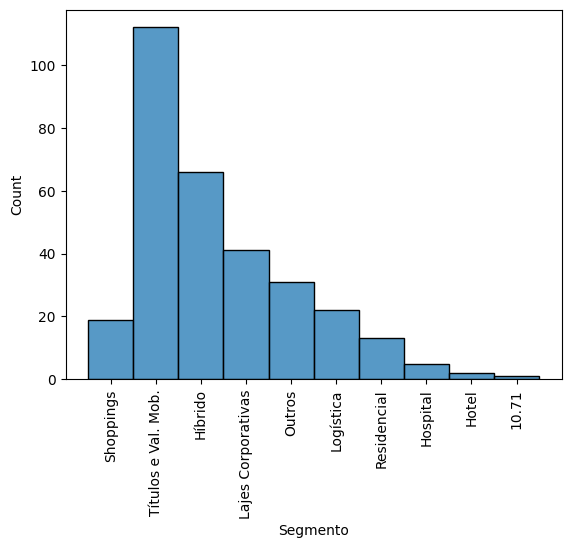

In [58]:
# sns.catplot(data=segXvalue['Valor de Mercado'], x=segXvalue.index, y='count')
xlabels = fiisDf.Segmento.unique()
sns.histplot(data=fiisDf, x="Segmento").set_xticklabels(rotation=90, labels=xlabels)

In [78]:
corr = fiisDf.corr()
numericCols = corr.index

Cotação x ultimoDividendo 	score	 0.2687087796491795


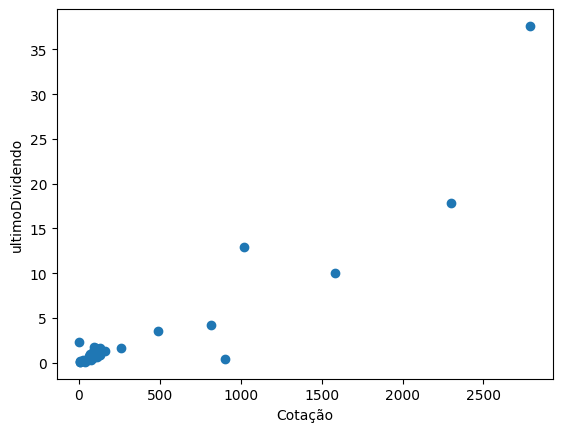

Valor de Mercado x Liquidez 	score	 0.6783606716026536


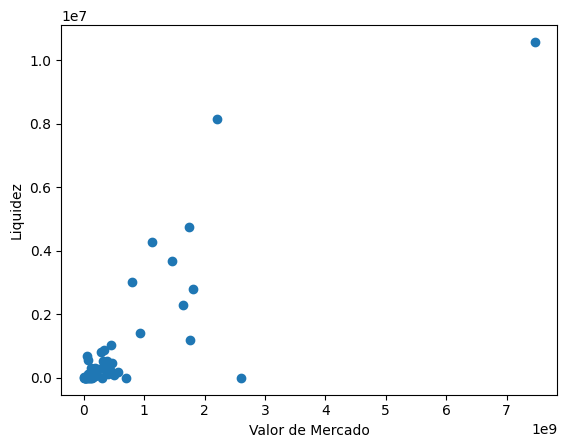

Liquidez x Valor de Mercado 	score	 0.7068017613707791


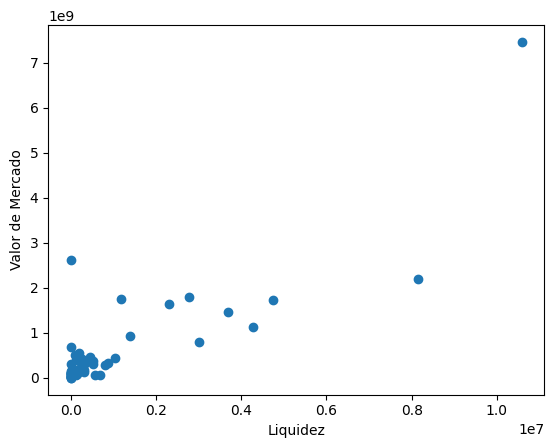

Preço do m2 x Aluguel por m2 	score	 0.3559320414203092


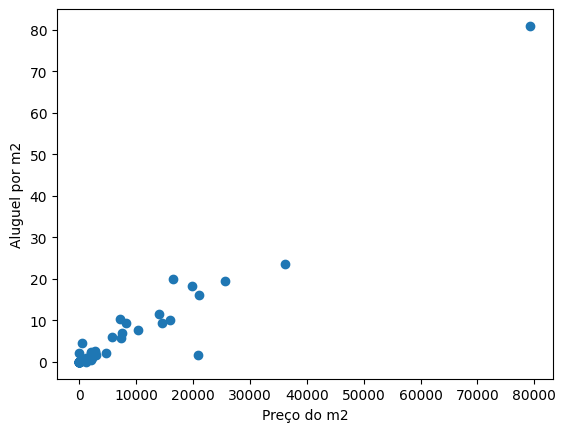

Aluguel por m2 x Preço do m2 	score	 0.6894225322364343


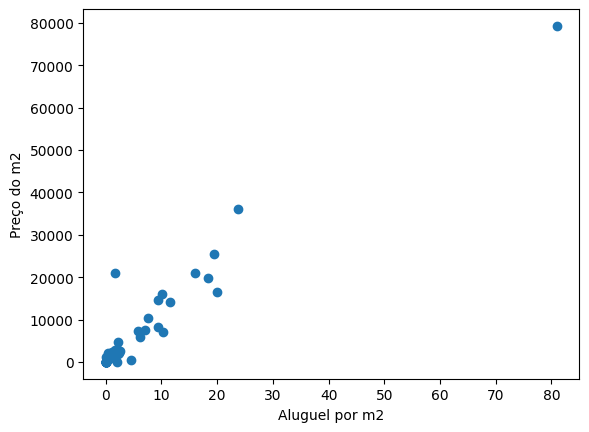

ultimoDividendo x Cotação 	score	 0.07781443434458213


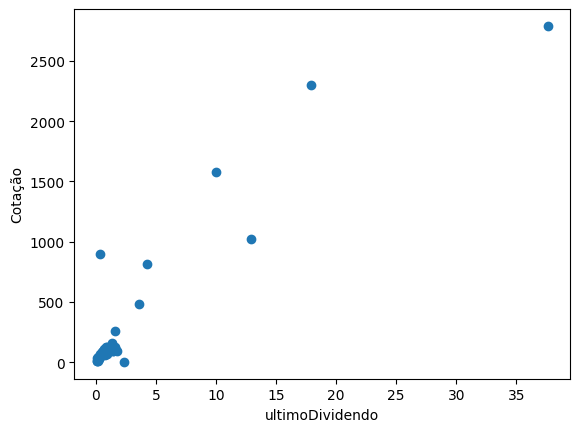

In [81]:
x_train, x_test, y_train, y_test = train_test_split(fiisDf, fiisDf, test_size=0.2)

for col1 in numericCols:
  relevantCols = corr[col1][(corr[col1].abs() > 0.4) & (corr[col1].abs() < 1)].index
  for col2 in relevantCols:
    model = LinearRegression()
    model.fit(x_train[[col1]], y_train[[col2]])
    score = model.score(x_test[[col1]], y_test[[col2]])
    y_pred = model.predict(x_test[[col1]])
    plt.scatter(x_test[[col1]], y_test[[col2]])
    # plt.plot(x_test[[col1]], y_pred[[col2]])
    plt.ylabel(col2)
    plt.xlabel(col1)
    print(col1, 'x', col2, "\tscore\t", score)
    plt.show()